# Opening Files

Bagian ini adalah bagian dimana kita mengambil data kita dari google spreadsheet.  

In [ ]:
#!pip install gspread oauth2client

**Import Library**

In [3]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials
from google.oauth2.service_account import Credentials
import pandas as pd
import numpy as np
import datetime
import re

**Read data from spreadsheet**

In [ ]:
# Masukkan scopes

scopes = [
    'https://www.googleapis.com/auth/spreadsheets',
    'https://www.googleapis.com/auth/drive'
]

# Masukkan credentials

credentials = Credentials.from_service_account_file(
    'gs_credentials.json', # file credentials dengan format JSON
    scopes=scopes
)

# Buka file spreadsheet

gc = gspread.authorize(credentials)
sh = gc.open_by_url("________________________________") # Link Spreadsheet
worksheet = sh.worksheet("________") # Nama sheet
list_of_lists = worksheet.get_all_values()

Sekarang kita sudah mendapatkan data dari google spreadsheet yang tersimpan dalam sebuah list. List ini memiliki nama `list_of_lists`. Tugas kita berikutnya adalah mengubah `list_of_lists` ini ke bentuk dataframe. 

In [77]:
data = pd.DataFrame(_______) # ubah list_of_list menjadi dataframe
data.columns = ______ # ubah baris pertama menjadi nama kolom
data = data.iloc[1:]

data.reset_index(drop=True, inplace=True) # Mereset penomoran index

# Analisis Data

Data kita tidak sepenuhnya bersih. Contohnya pada kolom `Country and Regions Name` masih tercampur-campur, ada nama negara dan ada nama bagian. Pada bagian ini, kita hanya akan menggunakan nama negara saja. Itu artinya, nama-nama lain selain nama negara harus kita hapus. 

Nama-nama yang perlu dihapus ini kita namakan dengan `deleted_countries`.

**Data Cleansing**

**Task 1:** Hapus nama-nama selain nama negara pada kolom Country and Regions Name  

In [90]:
deleted_countries = ['Africa', 'Central Africa', 'East Africa', 'North Africa', 'Southern Africa', 'West Africa', 'Sub-Saharan Africa', '',
                     'African Development Bank', 'http://dataportal.opendataforafrica.org/mhuiccf/african-economic-outlook-january-2019']
data = _______________________________

Data yang berasal dari spreadsheet, tidak akan memiliki nilai NaN. Semua nilai NaN akan disimpan sebagai "". Nilai "" harus diganti dengan nilai NaN. 

In [91]:
import numpy as np

numbers = data.iloc[:,7:]

for col in numbers.columns:
    for row, val in enumerate(numbers[col]):
        if val == '':
            numbers.loc[row, col] = np.nan
            
data.iloc[:, 7:] = np.float32(numbers)            

<ipython-input-91-335c9edf7222>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.iloc[:, 7:] = np.float32(numbers)


# Analisis 

**Bandingkan nilai ekspor dari negara dengan GDP terbesar dan terkecil mulai tahun 2016 sampai 2020 dengan menggunakan barplot?**

### Negara Dengan GDP Terbesar dan Terkecil

Langkah pertama yang harus kita lakukan untuk menjawab tantangan diatas adalah mencari tahu terlebih dahulu negara dengan GDP terbesar dan terkecil. Untuk itu kita akan membuat dataframe baru bernama `data_gdp`. 

**Data Wrangling**

**Task 2:** Buat dataframe baru dengan menyeleksi kolom `Indicators Name` berdasarkan indikator `Gross domestic product`

In [ ]:
data_gdp = ______________________________
data_gdp.head()

**Task 3:** Carilah negara mana yang memiliki GDP terbersar dan terkecil pada tahun 2020

In [106]:
country_max = __________________________________
country_min = __________________________________

Karena kita sekarang sudah mendapatkan nama negara dengan GDP terbesar dan terkecil di Afrika, maka sekarang kita bisa mencari tahu progress ekspor kedua negara ini. 

**Data Visualization**

**Task 4:** Carilah progress ekspor dari negara dengan GDP terbesar dan terkecil kemudian buatlah visualisasinya

In [171]:
indicator = "Exports of goods and services (% of GDP)"

display_data = ____________________________
display_data.index = _________________________

In [173]:
display_data = display_data.transpose()
display_data.index.name = "_____"

<AxesSubplot:title={'center':'Exports of goods and services (% of GDP)'}, xlabel='Year'>

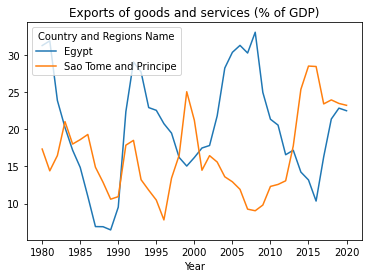

In [175]:
display_data.plot(title=______)

# Uploading Files

Selain bisa digunakan untuk mengimport data, library `gspread` juga bisa digunakan untuk mengupload data. Pada tahapan ini kita akan belajar bagaimana caranya mengupload dataframe kita dari python notebook ke dalam google spreadsheet. 

Dataframe yang akan kita upload disini adalah dataframe yang berisikan informasi tentang persentase ekspor dari GDP dari semua negara di Afrika.  

**Task 5:** Buatlah dataframe baru dengan informasi presentase ekspor GDP dari semua negara di Afrika.

In [157]:
upload_data = ____________________
upload_data.index = ___________________
upload_data.reset_index(inplace=True)

In [159]:
upload_data.head()

,Country and Regions Name,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Algeria,34.339691,34.559776,31.231066,28.70916,26.367777,22.328875,13.37925,14.930294,16.328688,...,38.786953,36.890549,33.209896,30.219118,23.173372,20.859726,22.636528,25.013565,25.097723,24.926678
1,Angola,55.451172,55.678562,47.826458,45.892853,43.294628,35.665833,24.649136,35.776562,35.691086,...,60.669949,55.940132,50.747086,44.69503,29.754599,28.124588,28.135605,33.528667,33.023579,31.060801
2,Benin,13.193213,18.04941,19.970177,15.09609,19.318743,22.266552,15.70294,14.372381,12.945098,...,21.381035,24.593065,28.1527,32.076927,28.192801,28.706234,31.019224,31.357412,32.840088,34.586765
3,Botswana,43.656136,48.115505,47.015636,55.837601,57.265427,60.246014,57.214516,56.659431,55.162319,...,49.950523,49.250732,61.522598,60.710049,53.033394,49.749428,39.827709,38.883461,39.132915,38.943363
4,Burkina Faso,8.136542,8.923958,8.361965,8.028555,11.391939,9.981747,8.615894,9.648495,10.20252,...,25.004446,27.272568,26.193142,25.936071,26.046247,30.28511,29.375164,29.315632,29.015039,29.810497


In [168]:
upload_data.fillna("", inplace=True)

**Task 6:** Upload data yang sudah bersih di spreadsheet

In [170]:
new_worksheet = sh.add_worksheet(title="Worksheet Lorem new", rows=100, cols=20)
new_worksheet.update([__________.columns.values.tolist()] + __________.values.tolist())

{'spreadsheetId': '1_z06QpzSGUNPpwNVPofnNOFkjk5zEh4YPrTr8h3JZdo',
 'updatedRange': "'Worksheet Lorem new'!A1:AP53",
 'updatedRows': 53,
 'updatedColumns': 42,
 'updatedCells': 2226}